<a href="https://colab.research.google.com/github/SGRGit/gwOsc/blob/Main/ClassifiySignalsOnCNN_Iteration2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
base_dir = "drive/My Drive/Colab Notebooks/SignalProc/Iteration 2"
seta = 'actual'
setb = 'noise'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

def prepare_data(base_dir, seta, setb):
    seta_train_dir = os.path.join(train_dir, seta)
    setb_train_dir = os.path.join(train_dir, setb)
    
    seta_valid_dir = os.path.join(validation_dir, seta)
    setb_valid_dir = os.path.join(validation_dir, setb)
    
    seta_train_fnnames = os.listdir(seta_train_dir)
    setb_train_fnnames = os.listdir(setb_train_dir)
    
    return seta_train_dir, setb_train_dir, seta_valid_dir, setb_valid_dir, seta_train_fnnames, setb_train_fnnames

seta_train_dir, setb_train_dir, seta_valid_dir, setb_valid_dir, seta_train_fnnames, setb_train_fnnames = prepare_data(base_dir, seta, setb)

seta_test_dir = os.path.join(test_dir, seta)
setb_test_dir = os.path.join(test_dir, setb)
test_fnnames_seta = os.listdir(seta_test_dir)
test_fnnames_setb = os.listdir(setb_test_dir)

In [0]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
%matplotlib inline
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

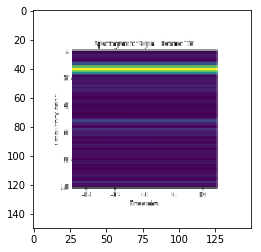

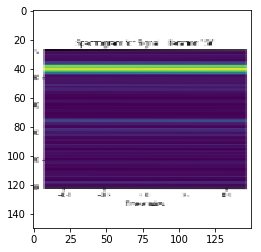

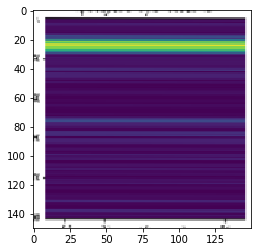

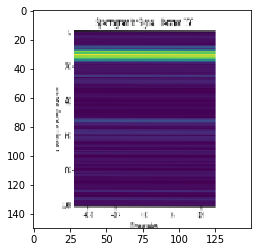

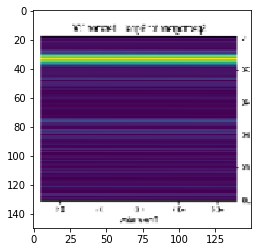

In [155]:
"""datagen = ImageDataGenerator(
            rotation_range = 40,
            width_shift_range = 0.2,
            height_shift_range = 0.2,
            shear_range = 0.2,
            zoom_range = 0.2,
            horizontal_flip=True,
            fill_mode = 'nearest')"""


data_generator = ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)


img_path = os.path.join(seta_train_dir, seta_train_fnnames[3])
img = load_img(img_path, target_size = (150,150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in data_generator.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 5 == 0:
        break


In [0]:
#Import Tensorflow Libraries
from tensorflow.keras import layers
from tensorflow.keras import Model

img_input = layers.Input(shape=(150, 150, 3))

# 2D Conv Layer with 64 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(64, 3, activation = 'relu')(img_input)
# 2D Max Pooling Layer
x = layers.MaxPooling2D(2)(x)

# 2D Conv Layer with 128 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(128, 3, activation = 'relu')(x)
# 2D Max Pooling Layer
x = layers.MaxPooling2D(2)(x)

# 2D Conv Layer with 256 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(256, 3, activation = 'relu')(x)
# 2D Max Pooling Layer
x = layers.MaxPooling2D(2)(x)

# 2D Conv Layer with 512 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(512, 3, activation = 'relu')(x)
# 2D Max Pooling Layer
x = layers.MaxPooling2D(2)(x)

#Additional Layers
# 2D Conv Layer with 512 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(512, 3, activation = 'relu')(x)

# 2D Conv Layer with 512 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(512, 3, activation = 'relu')(x)

# 2D Conv Layer with 512 filters of dimension 3x3 and ReLU activation function
x = layers.Conv2D(512, 3, activation = 'relu')(x)

# Faltten Layer
x = layers.Flatten()(x)

# Fully Connected Layers and ReLU activation algoritm
x = layers.Dense(4096, activation = 'relu')(x)
x = layers.Dense(4096, activation = 'relu')(x)
x = layers.Dense(1000, activation = 'relu')(x)

# Dropout Layer for Optimization
x = layers.Dropout(0,noise_shape=None, seed=None)(x)

# Fully connected layers and sigmoid activation algorithm
output = layers.Dense(1, activation = 'sigmoid')(x)

#output = layers.Flatten(data_format=None)

model = Model(img_input, output)


In [149]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 256)       0   

In [0]:
import tensorflow as tf
model.compile(loss = 'binary_crossentropy',
             optimizer = tf.train.AdamOptimizer(learning_rate = 0.0005),
             metrics = ['acc'])

In [156]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#train_datagen = ImageDataGenerator(rescale = 1/.255)
#Image Generator
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale = 1. /255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size= (150,150),
                    batch_size = 20,
                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
                    test_dir,
                    target_size= (150,150),
                    batch_size = 20,
                    class_mode = 'binary')

Found 854 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


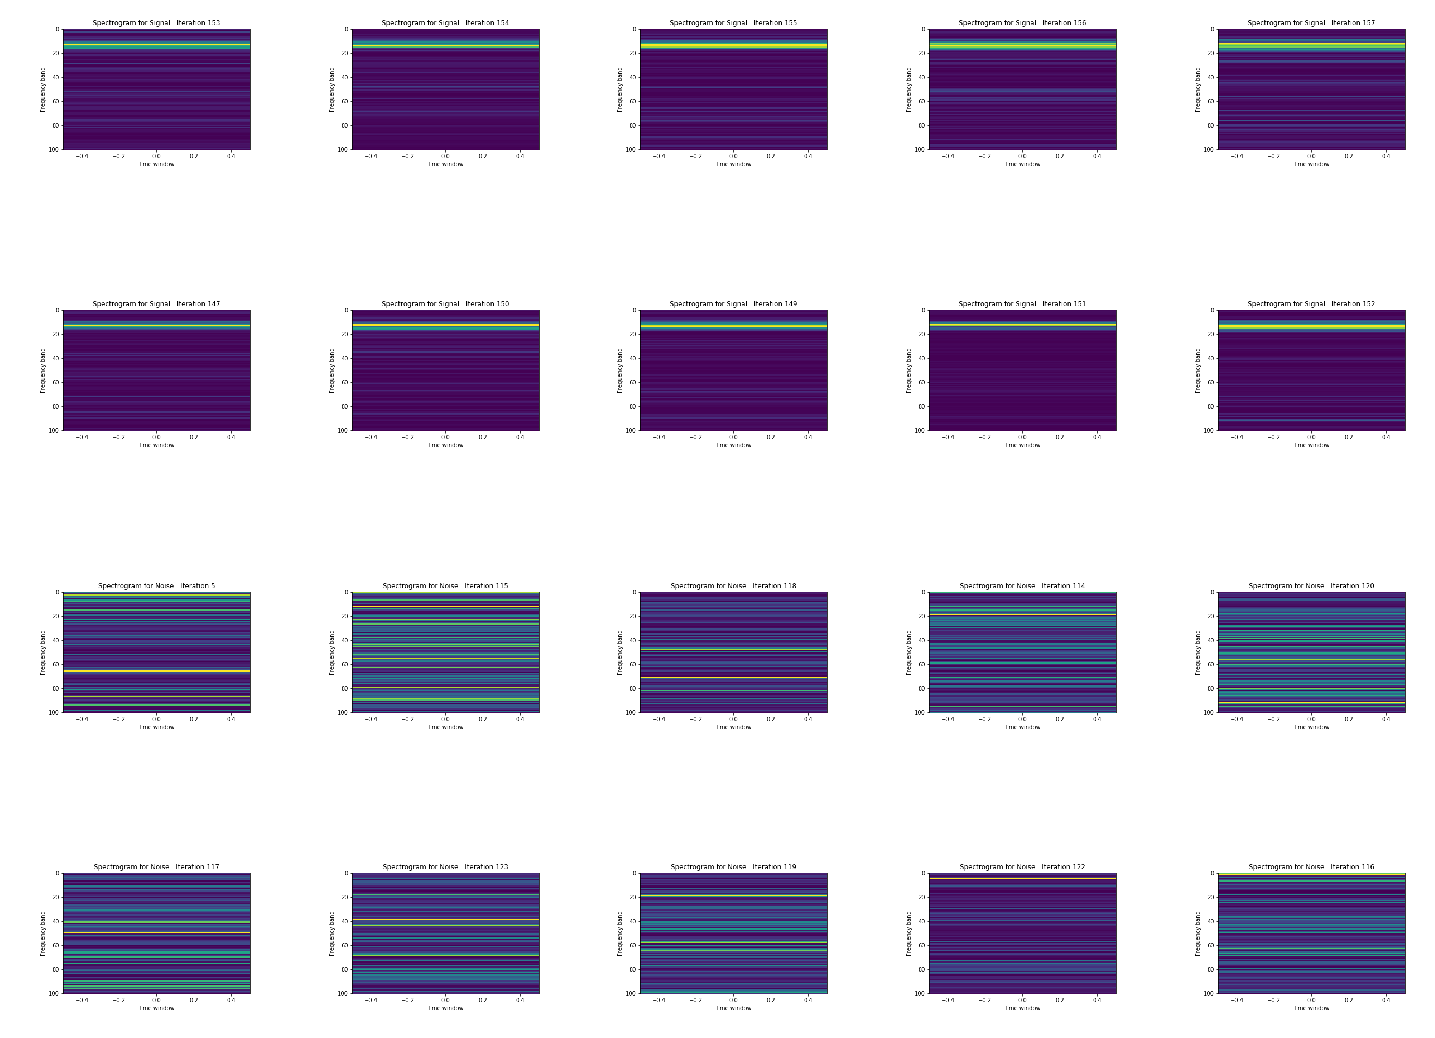

In [157]:
import matplotlib.image as mpimg

nrows = 5
ncols = 5

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)

pic_index += 10

next_seta_pix = [os.path.join(seta_train_dir, fname)
                 for fname in seta_train_fnnames[pic_index-10:pic_index]]

next_setb_pix = [os.path.join(setb_train_dir, fname)
                 for fname in setb_train_fnnames[pic_index-10:pic_index]]

for i, img_path in enumerate(next_seta_pix+next_setb_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [158]:
#train the model
mymodel = model.fit_generator(
        train_generator,
        steps_per_epoch = 10,
        epochs = 20,
        validation_data = validation_generator,
        validation_steps = 7,
        verbose = 2)

Epoch 1/20
Epoch 1/20
10/10 - 88s - loss: 0.6934 - acc: 0.5050 - val_loss: 0.7140 - val_acc: 0.4214
Epoch 2/20
Epoch 1/20
10/10 - 62s - loss: 0.6469 - acc: 0.5979 - val_loss: 0.6713 - val_acc: 0.4214
Epoch 3/20
Epoch 1/20
10/10 - 70s - loss: 0.6216 - acc: 0.6150 - val_loss: 0.4714 - val_acc: 0.4643
Epoch 4/20
Epoch 1/20
10/10 - 67s - loss: 0.4439 - acc: 0.8000 - val_loss: 0.1234 - val_acc: 0.9643
Epoch 5/20
Epoch 1/20
10/10 - 49s - loss: 0.6674 - acc: 0.7750 - val_loss: 0.4555 - val_acc: 0.9571
Epoch 6/20
Epoch 1/20
10/10 - 42s - loss: 0.4561 - acc: 0.7938 - val_loss: 0.2077 - val_acc: 1.0000
Epoch 7/20
Epoch 1/20
10/10 - 43s - loss: 0.3320 - acc: 0.8650 - val_loss: 0.0768 - val_acc: 0.9714
Epoch 8/20
Epoch 1/20
10/10 - 42s - loss: 0.3985 - acc: 0.8650 - val_loss: 0.2340 - val_acc: 0.9357
Epoch 9/20
Epoch 1/20
10/10 - 43s - loss: 0.3719 - acc: 0.8950 - val_loss: 0.1770 - val_acc: 0.9714
Epoch 10/20
Epoch 1/20
10/10 - 43s - loss: 0.4515 - acc: 0.8450 - val_loss: 0.2904 - val_acc: 0.9143

Text(0.5, 1.0, 'Training and Validation Loss')

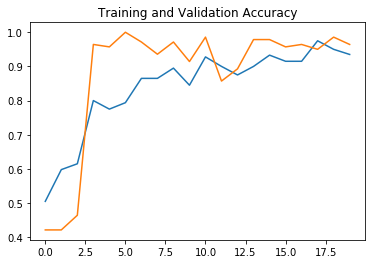

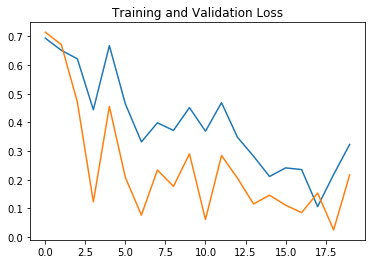

In [159]:
acc = mymodel.history['acc']
val_acc = mymodel.history['val_acc']

loss = mymodel.history['loss']
val_loss = mymodel.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and Validation Accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and Validation Loss')


(1, 150, 150, 3)


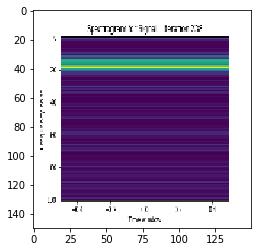

In [160]:
import random
import numpy as np
train_img = random.choice(seta_train_fnnames)
train_image_path = os.path.join(seta_train_dir, train_img)
train_img = load_img(train_image_path, target_size = (150, 150))
plt.imshow(train_img)
train_img = (np.expand_dims(train_img, 0))
print(train_img.shape)

In [161]:
model.predict(train_img)

array([[0.]], dtype=float32)

(1, 150, 150, 3)


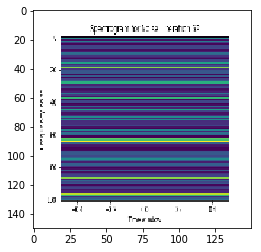

In [162]:
train_img = random.choice(setb_train_fnnames)
train_image_path = os.path.join(setb_train_dir, train_img)
train_img = load_img(train_image_path, target_size = (150, 150))
plt.imshow(train_img)
train_img = (np.expand_dims(train_img, 0))
print(train_img.shape)

In [163]:
model.predict(train_img)

array([[1.]], dtype=float32)

(1, 150, 150, 3)


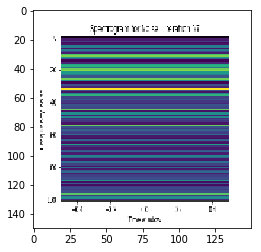

In [164]:
test_img = random.choice(test_fnnames_setb)
test_image_path = os.path.join(setb_test_dir, test_img)
test_img = load_img(test_image_path, target_size = (150, 150))
plt.imshow(test_img)
test_img = (np.expand_dims(test_img, 0))
print(test_img.shape)

In [165]:
model.predict(test_img)

array([[1.]], dtype=float32)

(1, 150, 150, 3)


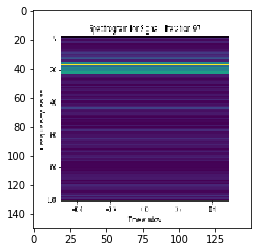

In [166]:
test_img = random.choice(test_fnnames_seta)
test_image_path = os.path.join(seta_test_dir, test_img)
test_img = load_img(test_image_path, target_size = (150, 150))
plt.imshow(test_img)
test_img = (np.expand_dims(test_img, 0))
print(test_img.shape)

In [167]:
model.predict(test_img)

array([[0.]], dtype=float32)

In [168]:
import numpy as np
cal_sign = 0
cal_ns = 0
cal_unconclusive = 0

alist=[]
for fname in test_fnnames_seta:
    if fname.startswith("."):
        continue
    file_path = os.path.join(seta_test_dir, fname)
    load_file = load_img(file_path, target_size = (150, 150))
    load_file = (np.expand_dims(load_file, 0))
    pred_img = model.predict(load_file)
    if(pred_img[0]<0.5):
        cal_sign+=1
    elif(pred_img[0]>0.5):
        cal_ns+=1
    else:
        print(pred_img[0], "\n")
        cal_unconclusive+=1
        alist.append(file_path)
print(alist)

print("Identified as: \n")
print("Noise :", cal_ns)
print("Contain Actual Signal :", cal_sign)
print("Inconclusive :", cal_unconclusive)
print("Percentage :", (cal_sign/(cal_sign+cal_unconclusive+cal_ns))*100)
a = (cal_sign/(cal_sign+cal_unconclusive+cal_ns))*100

[]
Identified as: 

Noise : 0
Contain Actual Signal : 70
Inconclusive : 0
Percentage : 100.0


In [169]:
import numpy as np
cal_sign = 0
cal_ns = 0
cal_unconclusive = 0

alist=[]
for fname in test_fnnames_setb:
    if fname.startswith("."):
        continue
    file_path = os.path.join(setb_test_dir, fname)
    load_file = load_img(file_path, target_size = (150, 150))
    load_file = (np.expand_dims(load_file, 0))
    pred_img = model.predict(load_file)
    if(pred_img[0]<0.5):
        cal_sign+=1
    elif(pred_img[0]>0.5):
        cal_ns+=1
    else:
        print(pred_img[0], "\n")
        cal_unconclusive+=1
        alist.append(file_path)
print(alist)

print("Identified as: \n")
print("Noise :", cal_ns)
print("Contain Actual Signal :", cal_sign)
print("Inconclusive :", cal_unconclusive)
print("Percentage :", (cal_ns/(cal_sign+cal_unconclusive+cal_ns))*100)
a = (cal_ns/(cal_sign+cal_unconclusive+cal_ns))*100

[]
Identified as: 

Noise : 46
Contain Actual Signal : 4
Inconclusive : 0
Percentage : 92.0


(1, 150, 150, 3)


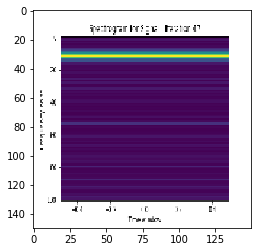

In [175]:
import random
rand_test_img = random.choice(test_fnnames_seta)

rand_test_img_path = os.path.join(seta_test_dir,test_fnnames_seta[29])
rand_test_img = load_img(rand_test_img_path, target_size = (150, 150))
plt.imshow(rand_test_img)
rand_test_img = np.expand_dims(rand_test_img, 0)
print(rand_test_img.shape)

In [176]:
print("identified as: \n")
if(model.predict(rand_test_img) < 0.5):
    print("Actual Signal with Noise")
elif(model.predict(rand_test_img) > 0.5):
    print("Noise")
else:
    print("Inconclusive")

identified as: 

Actual Signal with Noise


# Evaluation

In [106]:
for fname in test_fnnames_setb:
    if fname.startswith("."):
        continue
    file_path = os.path.join(setb_test_dir, fname)
    load_file = load_img(file_path, target_size = (150, 150))
    load_file = (np.expand_dims(load_file, 0))
    pred_img = model.predict(load_file)
print (load_file.shape)

(1, 150, 150, 3)


In [0]:
from sklearn.metrics import confusion_matrix

In [140]:
alist = []
blist = []
for fname in test_fnnames_seta:
    file_path = os.path.join(seta_test_dir, fname)
    load_file = load_img(file_path, target_size = (150, 150))
    load_file = (np.expand_dims(load_file, 0))
    pred_img = model.predict(load_file)
    alist.append(pred_img)
    blist.append(load_file)
confusion_matrix(blist, alist)

ValueError: ignored